# Laplace transform

This notebook is a short tutorial of Laplace transform using SymPy.

The main functions to use are ``laplace_transform`` and ``inverse_laplace_transform``.


In [1]:
from sympy import *

In [2]:
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


Let us compute the Laplace transform from variables $t$ to $s$, then, we have the condition that $t>0$ (and real).

In [3]:
t = symbols("t", real=True, positive=True)
s = symbols("s")

To calculate the Laplace transform of the expression $t^4$, we enter

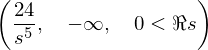

In [4]:
laplace_transform(t**4, t, s)

This function returns ``(F, a, cond)`` where ``F`` is the Laplace transform of ``f``, $\mathcal{R}(s)>a$ is the half-plane of convergence, and ``cond`` are auxiliary convergence conditions.

If we are not interested in the conditions for the convergence of this transform, we can use ``noconds=True``

In [5]:
laplace_transform(t**4, t, s, noconds=True)

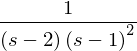

In [6]:
fun = 1/((s-2)*(s-1)**2)
fun

In [7]:
inverse_laplace_transform(fun, s, t)

Right now, Sympy does not support the tranformation of derivatives.

If we do

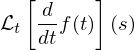

In [8]:
laplace_transform(f(t).diff(t), t, s, noconds=True)

we don't obtain, the expected

In [9]:
s*LaplaceTransform(f(t), t, s) - f(0)


or,

$$\mathcal{L}\lbrace f^{(n)}(t)\rbrace = s^n F(s) - \sum_{k=1}^{n} s^{n - k} f^{(k - 1)}(0)\, ,$$

in general.

We can still, operate with the trasformation of a differential equation.

For example, let us consider the equation

$$\frac{d f(t)}{dt} = 3f(t) + e^{-t}\, ,$$

that has as Laplace transform

$$sF(s) - f(0) = 3F(s) + \frac{1}{s+1}\, .$$

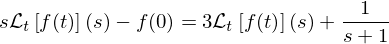

In [10]:
eq = Eq(s*LaplaceTransform(f(t), t, s) - f(0), 3*LaplaceTransform(f(t), t, s) + 1/(s +1))
eq

We then solve for $F(s)$

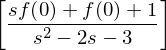

In [11]:
sol = solve(eq, LaplaceTransform(f(t), t, s))
sol

and compute the inverse Laplace transform

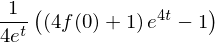

In [12]:
inverse_laplace_transform(sol[0], s, t)

and we verify this using ``dsolve``

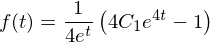

In [13]:
factor(dsolve(f(t).diff(t) - 3*f(t) - exp(-t)))

that is equal if $4C_1 = 4f(0) + 1$.

It is common to use practial fraction decomposition when computing inverse
Laplace transforms. We can do this using ``apart``, as follows

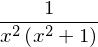

In [14]:
frac = 1/(x**2*(x**2 + 1))
frac

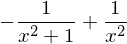

In [15]:
apart(frac)

We can also compute the Laplace transform of Heaviside
and Dirac's Delta "functions"

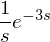

In [16]:
laplace_transform(Heaviside(t - 3), t, s, noconds=True)

In [17]:
laplace_transform(DiracDelta(t - 2), t, s, noconds=True)

The next cell change the format of the notebook.

In [18]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()